# PISA 2012 Exploration

## Introduction

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. This survey examines how well students have learned the school curriculum, how well prepared they are for life beyond school.
Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

## Preliminary Wrangling

In [1]:
# importing the relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile

%matplotlib inline

In [2]:
# Extracting all the contents in the zip file
with zipfile.ZipFile('pisa2012.csv.zip', 'r') as file:
    file.extractall()

In [3]:
# reading the csv file
df_pisa = pd.read_csv('pisa2012.csv', encoding='latin-1', sep=',', error_bad_lines=False,
                       dtype='unicode')
df_pisa.shape

(485490, 636)

In [4]:
df_pisa.describe()

Unnamed: 0     CNT SUBNATIO  STRATUM    OECD       NC SCHOOLID STIDSTD  \
count      485490  485490   485490   485490  485490   485490   485490  485490   
unique     485490      68       87     1187       2       66     1471   33806   
top        248686  Mexico  4840000  JOR9797    OECD  Mexico   0000028   00184   
freq            1   33806    33806     7038  295416    33806     2646      68   

       ST01Q01 ST02Q01  ... W_FSTR75 W_FSTR76 W_FSTR77 W_FSTR78 W_FSTR79  \
count   485490  485438  ...   485490   485490   485490   485490   485490   
unique       8      25  ...    47165    47173    47174    47282    47200   
top         10       1  ...      1.5      0.5      0.5      1.5      1.5   
freq    262631  243377  ...     7168     7154     7148     7162     7150   

       W_FSTR80 WVARSTRR VAR_UNIT SENWGT_STU  VER_STU  
count    485490   485490   485490     485490   485490  
unique    47285       80        3       4714        1  
top         1.5       21        1     0.0909  22NOV13  
freq       7161     6632   237874       7058   485490  

[4 rows x 636 columns]

### What is the structure of the dataset
- The PISA dataset provided for this analysis, pisa2012.csv, contains data from a total of 485,490 students grouped into 636 columns.
- This dataset does not only contain the results from the exam in each category, but also loads of information on the students' background, including other variables like country of residence, number of family members and their level of education, possessions or access to different facilities at home and school and more.

### Features of interest
After careful assessment of the complex dataset, I have decided that the following variables will be important for my exploration

In [5]:
#Select desired columns
pisa = df_pisa[['CNT', 'ST04Q01', 'AGE', 'IMMIG', 'ST25Q01', 'FAMSTRUC','HISCED', 'HEDRES', 'WEALTH', 'HOMEPOS',
'CULTPOS','ST26Q02', 'ST26Q06', 'ST13Q01', 'ST17Q01', 'ST43Q01', 'ST53Q01', 'BELONG', 'TIMEINT', 'LMINS', 'MMINS', 'SMINS','PV1MATH', 'PV2MATH', 'PV3MATH', 
'PV4MATH','PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'
,'ANXMAT','ATTLNACT','STUDREL']]

In [6]:
# Renaming each column suitably
pisa = pisa.rename(columns={'CNT': 'country', 'ST04Q01': 'gender', 'AGE': 'age', 'IMMIG': 'immigration_status',
                   'ST25Q01': 'international_home_language', 'FAMSTRUC': 'family_structure', 'HISCED':'highest_parents_education',
                   'HEDRES': 'home_educational_resources', 'WEALTH': 'wealth',
                   'HOMEPOS': 'home_possessions', 'CULTPOS': 'cultural_possessions', 'ST26Q02':'own_room', 'ST26Q06':'internet_access', 
                    'ST13Q01': 'mothers_education','ST17Q01': 'fathers_education','ST43Q01': 'perceived_control',
                   'ST53Q01': 'learning_strategies', 'BELONG': 'sense_belonging', 'TIMEINT': 'time_computer_use',
                   'LMINS': 'language_learning_time', 'MMINS': 'math_learning_time', 'SMINS': 'science_learning_time', 
                   'PV1MATH': 'm1', 'PV2MATH':'m2','PV2MATH':'m2','PV3MATH':'m3', 'PV4MATH':'m4', 'PV5MATH':'m5', 
                   'PV1READ': 'r1', 'PV2READ': 'r2', 'PV3READ': 'r3', 'PV4READ': 'r4', 'PV5READ': 'r5', 
                   'PV1SCIE': 's1', 'PV2SCIE': 's2', 'PV3SCIE': 's3', 'PV4SCIE': 's4', 'PV5SCIE': 's5', 'ANXMAT':'maths_anxiety', 
                    'ATTLNACT':'att_tow_sch_act', 'STUDREL': 'teacher_stu_rel' })


#### brief explanation of the chosen columns

- **Inmigration status**: (1) native parent (those parents who had at least one parent (students’ grandparent) born in the country of the assessment); (2) second generation parent (those born in the country of assessment but whose parent(s) were born in another country); (3) first-generation parent (those parent born outside the country of assessment and whose parents were also born outside the country of assessment). Parents with missing responses for either the parent or for both grandparents were assigned missing values for these.
- **International Home Language'**: (1) language at home is the same as the language of assessment for that student and (2) language at home is another language.
- **Family Structure**: “1” if “single parent family” (students living with only one of the following: mother, father, male guardian, female guardian), “2” if “two parent family” (students living with a father or step/foster father and a mother or step/foster mother) and “3” for students who do not live with their parents.
- **Highest educational level of mother and father**:  (0) None, (1) <ISCED level 1> (primary education), (2) <ISCED level 2> (lower secondary), (3) <ISCED level 3B or 3C> (vocational/pre-vocational upper secondary), (4) <ISCED level 3A> (general upper secondary) and/or <ISCED level 4> (non-tertiary post-secondary), (5) <ISCED level 5B> (vocational tertiary) and (6) <ISCED level 5A> and/or <ISCED level 6> (theoretically oriented tertiary and post-graduate).

- **Home Possessions**: This index is a summary of all household items from the columns wealth, cultural_possessions and home_educational_resources, but it also included the variable indicating the number of books at home (ST28) which was recoded from the original six categories into three: (0) 0-25 books, (1) 26-100 books, (2) more than 100.
- **Sense of belonging**: This indicates the degree to which each student feels that he or she belongs to his or her school. The PISA report states that this indicator has a moderate to low reliability. A higher number indicates a higher sense of belonging.
- **Perceived control**: To what extent do you identify with the statement "I can succeed with enough effort"? The answers ranges from "strongly agree" to "strongly disagree".
- **Learning strategies**: Learn the important parts of the subject, relate new knowledge to existing concepts and learn by heart.
- **Mathematics anxiety**: student's level of fear of mathematics

In [7]:
pisa.dtypes

country                        object
gender                         object
age                            object
immigration_status             object
international_home_language    object
family_structure               object
highest_parents_education      object
home_educational_resources     object
wealth                         object
home_possessions               object
cultural_possessions           object
own_room                       object
internet_access                object
mothers_education              object
fathers_education              object
perceived_control              object
learning_strategies            object
sense_belonging                object
time_computer_use              object
language_learning_time         object
math_learning_time             object
science_learning_time          object
m1                             object
m2                             object
m3                             object
m4                             object
m5          

In [8]:
# change data types to appropriate types
# let's begin with the scores related column

pisa = pisa.astype({'m1':float,'m2':float,'m3':float,'m4':float,'m5':float,
                    'r1':float,'r2':float,'r3':float,'r4':float,'r5':float,
                    's1':float,'s2':float,'s3':float,'s4':float,'s5':float,
               })

In [9]:
# getting the mean score for each

pisa['maths_score'] = (pisa['m1']+pisa['m2']+pisa['m3']+pisa['m4']+pisa['m5'])/5
pisa['reading_score'] = (pisa['r1']+pisa['r2']+pisa['r3']+pisa['r4']+pisa['r5'])/5
pisa['science_score'] = (pisa['s1']+pisa['s2']+pisa['s3']+pisa['s4']+pisa['s5'])/5

In [10]:
# dropping the irrelevant columns
pisa.drop(['m1','m2','m3','m4','m5',
           'r1','r2','r3','r4','r5',
           's1','s2','s3','s4','s5',], axis = 1, inplace=True)

In [11]:
# We then create a column for the total score
pisa['total_score'] = pisa['maths_score']+pisa['reading_score']+pisa['science_score']

In [12]:
pisa.head()

country  gender    age immigration_status international_home_language  \
0  Albania  Female  16.17             Native        Language of the test   
1  Albania  Female  16.17             Native        Language of the test   
2  Albania  Female  15.58             Native        Language of the test   
3  Albania  Female  15.67             Native        Language of the test   
4  Albania  Female   15.5             Native        Language of the test   

  family_structure highest_parents_education home_educational_resources  \
0                2         ISCED 3A, ISCED 4                      -1.29   
1                2               ISCED 5A, 6                       1.12   
2                2               ISCED 5A, 6                      -0.69   
3                2               ISCED 5A, 6                       0.04   
4                2         ISCED 3A, ISCED 4                      -0.69   

  wealth home_possessions  ... language_learning_time math_learning_time  \
0  -2.92            -2.61  ...                    NaN                NaN   
1   0.69             1.41  ...                    315                270   
2  -0.23             0.14  ...                    300                NaN   
3  -1.17            -0.73  ...                    135                135   
4  -1.17            -0.57  ...                    NaN                NaN   

  science_learning_time maths_anxiety att_tow_sch_act teacher_stu_rel  \
0                   NaN          0.32          0.5206           -1.04   
1                    90           NaN             NaN             NaN   
2                   NaN           NaN             NaN             NaN   
3                    90          0.31             NaN             NaN   
4                   NaN          1.02          1.2115           -0.02   

  maths_score reading_score science_score total_score  
0   366.18634     261.01424     371.91348   999.11406  
1   470.56396     384.68832     478.12382  1333.37610  
2   505.53824     405.18154     486.60946  1397.32924  
3   449.45476     477.46376     453.97240  1380.89092  
4   385.50398     256.01010     367.15778  1008.67186  

[5 rows x 29 columns]

In [13]:
pisa.internet_access.value_counts()

Yes    402040
No      71142
Name: internet_access, dtype: int64

In [14]:
pisa.country.value_counts()

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
                            ...  
Florida (USA)                1896
Perm(Russian Federation)     1761
Massachusetts (USA)          1723
Connecticut (USA)            1697
Liechtenstein                 293
Name: country, Length: 68, dtype: int64

In [15]:
pisa.gender.value_counts()

Female    245064
Male      240426
Name: gender, dtype: int64

In [16]:
pisa.international_home_language.value_counts()

Language of the test    408141
Other language           57355
Name: international_home_language, dtype: int64

In [17]:
pisa.family_structure.value_counts()

2    360003
1     58264
3     10791
Name: family_structure, dtype: int64

In [18]:
pisa.immigration_status.value_counts()

Native               417347
Second-Generation     28268
First-Generation      26178
Name: immigration_status, dtype: int64

In [19]:
pisa.mothers_education.value_counts()

<ISCED level 3A>                         236993
<ISCED level 3B, 3C>                      83048
<ISCED level 2>                           82614
<ISCED level 1>                           36556
She did not complete <ISCED level 1>      18768
Name: mothers_education, dtype: int64

In [20]:
pisa.fathers_education.value_counts()

<ISCED level 3A>                        215280
<ISCED level 3B, 3C>                     91179
<ISCED level 2>                          84329
<ISCED level 1>                          35938
He did not complete <ISCED level 1>      16535
Name: fathers_education, dtype: int64

In [21]:
pisa.perceived_control.value_counts()

Strongly agree       155325
Agree                137816
Disagree              18002
Strongly disagree      3828
Name: perceived_control, dtype: int64

In [22]:
pisa.learning_strategies.value_counts()

Most important       148418
relating to known     99437
by heart              62092
Name: learning_strategies, dtype: int64

In [23]:
# converting the following columns to category types
cols = ['gender','immigration_status','international_home_language','family_structure', 'mothers_education','internet_access',
       'fathers_education','perceived_control','learning_strategies']
for col in cols:
    pisa[col] = pisa[col].astype('category')

In [24]:
# Exporting the newly created data frame
pisa.to_csv('pisa_cleaned.csv', index=False)

I have managed to drastically reduce this very enormous dataset containing 600+ columns to a dataset containing just 28 columns as this will be the required columns for my analysis.

### We then move to data exploration

## Univariate Exploration

In [25]:
df = pd.read_csv('pisa_cleaned.csv')
df.head()

country  gender    age immigration_status international_home_language  \
0  Albania  Female  16.17             Native        Language of the test   
1  Albania  Female  16.17             Native        Language of the test   
2  Albania  Female  15.58             Native        Language of the test   
3  Albania  Female  15.67             Native        Language of the test   
4  Albania  Female  15.50             Native        Language of the test   

   family_structure highest_parents_education  home_educational_resources  \
0               2.0         ISCED 3A, ISCED 4                       -1.29   
1               2.0               ISCED 5A, 6                        1.12   
2               2.0               ISCED 5A, 6                       -0.69   
3               2.0               ISCED 5A, 6                        0.04   
4               2.0         ISCED 3A, ISCED 4                       -0.69   

   wealth  home_possessions  ...  language_learning_time math_learning_time  \
0   -2.92             -2.61  ...                     NaN                NaN   
1    0.69              1.41  ...                   315.0              270.0   
2   -0.23              0.14  ...                   300.0                NaN   
3   -1.17             -0.73  ...                   135.0              135.0   
4   -1.17             -0.57  ...                     NaN                NaN   

  science_learning_time maths_anxiety att_tow_sch_act teacher_stu_rel  \
0                   NaN          0.32          0.5206           -1.04   
1                  90.0           NaN             NaN             NaN   
2                   NaN           NaN             NaN             NaN   
3                  90.0          0.31             NaN             NaN   
4                   NaN          1.02          1.2115           -0.02   

  maths_score  reading_score  science_score  total_score  
0   366.18634      261.01424      371.91348    999.11406  
1   470.56396      384.68832      478.12382   1333.37610  
2   505.53824      405.18154      486.60946   1397.32924  
3   449.45476      477.46376      453.97240   1380.89092  
4   385.50398      256.01010      367.15778   1008.67186  

[5 rows x 29 columns]

### 1. How are the scores distributed

In [26]:
print(df['maths_score'].describe())
print(df['reading_score'].describe())
print(df['science_score'].describe())

count    485490.000000
mean        469.651234
std         100.786610
min          54.767080
25%         396.019620
50%         465.734520
75%         540.123060
max         903.107960
Name: maths_score, dtype: float64
count    485490.000000
mean        472.006964
std          98.863310
min           6.445400
25%         405.044200
50%         475.477980
75%         542.831195
max         849.359740
Name: reading_score, dtype: float64
count    485490.000000
mean        475.808094
std          97.998470
min          25.158540
25%         405.762800
50%         475.512860
75%         546.381920
max         857.832900
Name: science_score, dtype: float64


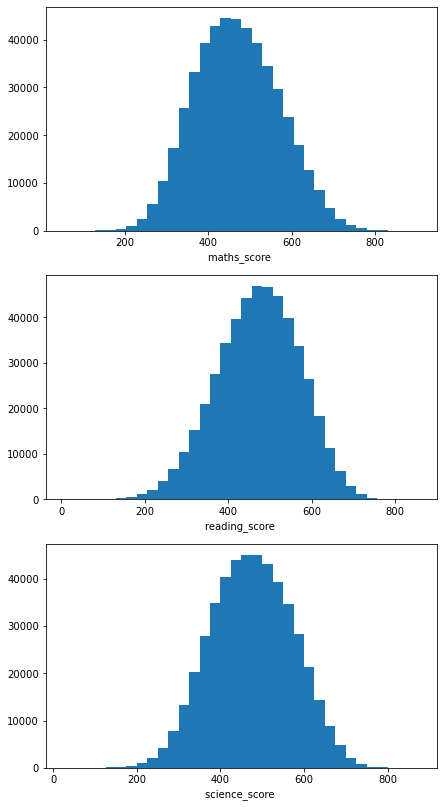

In [27]:
# plotting the distribution of the scores
fig, ax = plt.subplots(nrows=3, figsize = [7,14])
bin_size = 25
scores = ['maths_score', 'reading_score', 'science_score']
for i in range(len(scores)):
    var = scores[i]
    bins = np.arange(min(df[var]), max(df[var])+bin_size, bin_size)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel('{} '.format(var))

plt.show()

As can be seen above that the scores in various topics seem to be normally distributed. Although, the reading score seem to be a little bit left skewed. 

In [28]:
df['total_score'].describe()

count    485490.000000
mean       1417.466292
std         288.108813
min         231.343780
25%        1211.977785
50%        1416.139380
75%        1624.367100
max        2479.776080
Name: total_score, dtype: float64

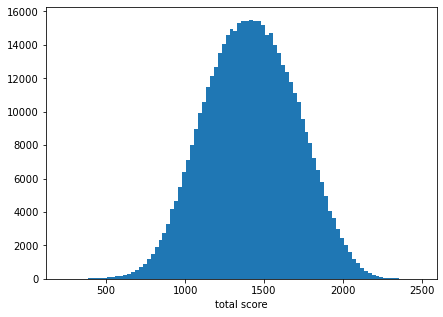

In [29]:
# let's then check the distribution of the total score
bins = np.arange(min(df['total_score']),max(df['total_score'])+25,25)
fig = plt.figure(figsize=[7,5])
plt.hist(data = df, x='total_score', bins=bins)
plt.xlabel('total score');

The plot is normally distributed i.e there are no visible outliers. As can be seen majority of the students attained a total score of at least 1300

### Distribution of student countries

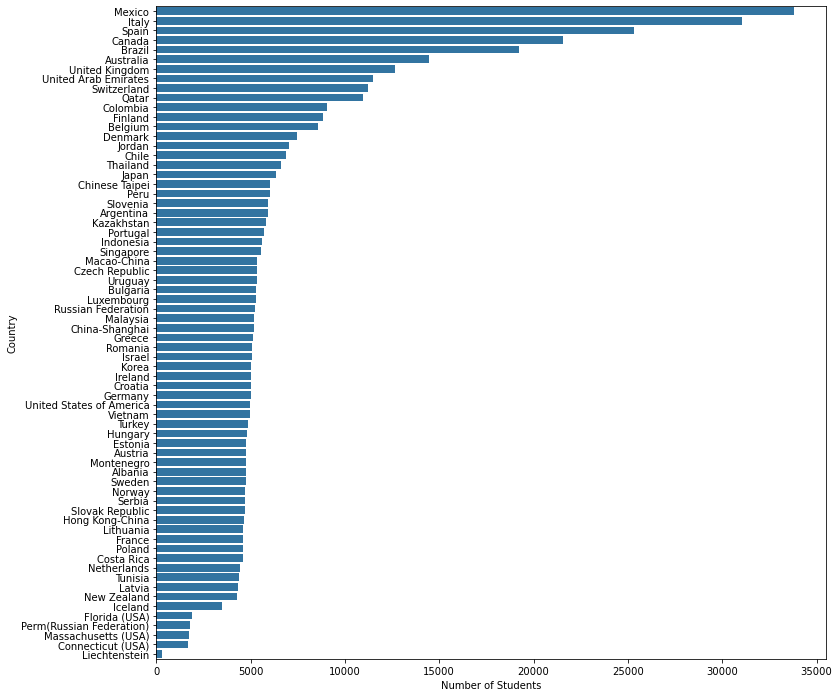

In [30]:
# sorted by frequency

plt.figure(figsize = [12, 12])
base_color = sb.color_palette()[0]
country_order = df.country.value_counts().index
sb.countplot(data=df, y='country', color = base_color, order = country_order)
plt.ylabel('Country');
plt.xlabel('Number of Students');

As can be seen on the graph, most of the students in this research reside in Mexico, Italy, Spain, Canada and Brazil while the least represented is Liechtenstein.

###  Distribution of student's immigration status

In [31]:
df['immigration_status'].value_counts()

Native               417347
Second-Generation     28268
First-Generation      26178
Name: immigration_status, dtype: int64

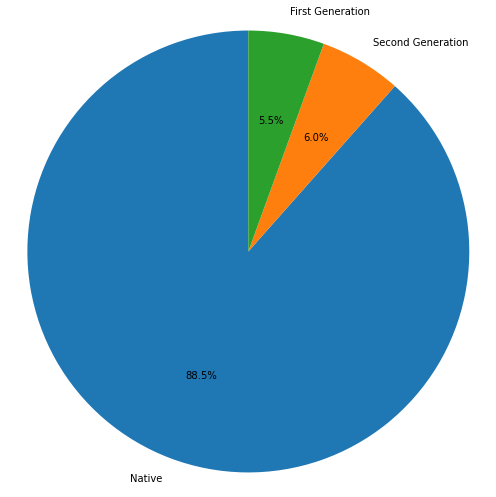

In [32]:
def plot_pie(data, labels):
    fig1, ax1 = plt.subplots(1, 1, figsize=(7, 7))
    ax1.pie(data.value_counts(),
                                    autopct='%0.1f%%',
                                    labels=labels,
                                    startangle=90)

    ax1.axis('equal')
    plt.tight_layout()
    plt.show();
    
label=['Native', 'Second Generation', 'First Generation']
plot_pie(df['immigration_status'], label)

- Most students are native to their country of residence. And there are less than 30,000 students in the first and second generation of immigrants.
- Both the first and second generation immigrants are almost equivalently reprensented in the dataset

### Representation of gender distribution

In [33]:
df['gender'].value_counts()

Female    245064
Male      240426
Name: gender, dtype: int64

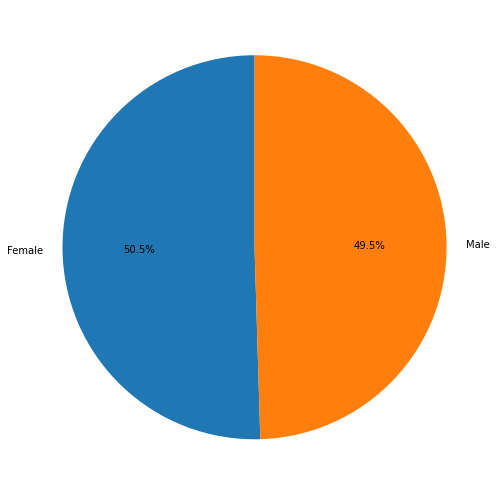

In [34]:
label = ['Female','Male']
plot_pie(df['gender'], label)

- As can be seen above, we have appoximately equal number of gender in the data set.

In [35]:
df.columns

Index(['country', 'gender', 'age', 'immigration_status',
       'international_home_language', 'family_structure',
       'highest_parents_education', 'home_educational_resources', 'wealth',
       'home_possessions', 'cultural_possessions', 'own_room',
       'internet_access', 'mothers_education', 'fathers_education',
       'perceived_control', 'learning_strategies', 'sense_belonging',
       'time_computer_use', 'language_learning_time', 'math_learning_time',
       'science_learning_time', 'maths_anxiety', 'att_tow_sch_act',
       'teacher_stu_rel', 'maths_score', 'reading_score', 'science_score',
       'total_score'],
      dtype='object')

### Wealth distribution in individual families

In [36]:
df['wealth'].describe()

count    479597.00000
mean         -0.33701
std           1.21530
min          -6.65000
25%          -1.04000
50%          -0.30000
75%           0.43000
max           3.25000
Name: wealth, dtype: float64

Text(0, 0.5, 'Number of students')

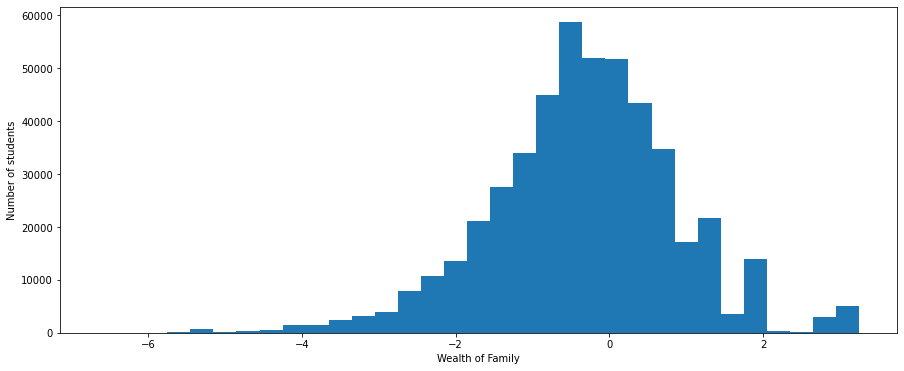

In [37]:
plt.figure(figsize=[15, 6])
bins = np.arange(df['wealth'].min(),df['wealth'].max()+.3,.3)

plt.hist(data = df, x = 'wealth', bins = bins);
plt.xlabel('Wealth of Family')
plt.ylabel('Number of students')

- As can be seen on the graph, the distribution of the student's wealth is slightly left-skewed

### Distribution of Family structure

In [38]:
df['family_structure'].value_counts()

2.0    360003
1.0     58264
3.0     10791
Name: family_structure, dtype: int64

In [39]:
# Renaming the labels for explanatory purpose
df['family_structure'] = df['family_structure'].map({1.0: 'single parent', 2.0: 'two parents', 3.0: 'no parents'})

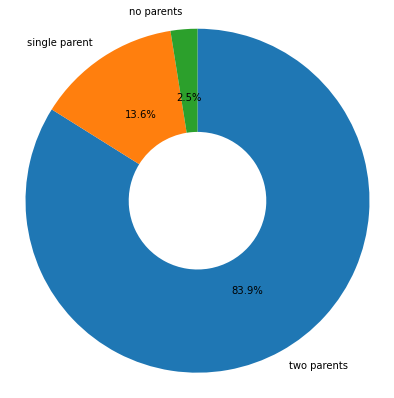

In [40]:
def plot_doughnut(data):
    sorted_counts = data.value_counts()
    plt.figure(figsize=[7,7])
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
            counterclock = False, wedgeprops = {'width' : 0.6}, autopct='%0.1f%%');
    plt.axis('square')
    
plot_doughnut(df['family_structure'])

- As can be seen above, 83.9% of the students in this data set live with both their parents while just 2.5% have no parents. In further exploration, we will analyze whether or not having parents played a significant role in the students performance

### Distribution of parents education

In [41]:
df['mothers_education'].value_counts()

<ISCED level 3A>                         236993
<ISCED level 3B, 3C>                      83048
<ISCED level 2>                           82614
<ISCED level 1>                           36556
She did not complete <ISCED level 1>      18768
Name: mothers_education, dtype: int64

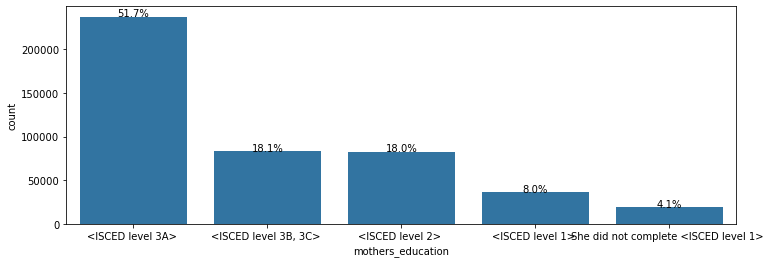

In [42]:
def count_plot(data, column):
    base_color = sb.color_palette()[0]
    type_order = data[column].value_counts().index
    n_edu = data[column].value_counts().sum()
    fig = plt.figure(figsize=(12,4))
    sb.countplot(data=data, x=column, color=base_color, order=type_order);



    # Recalculating the type_counts just to have clarity.
    type_counts = data[column].value_counts()

    # get the current tick locations and labels
    locs, labels = plt.xticks() 

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = type_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_edu)

        # print the annotation just below the top of the bar
        plt.text(loc, count+200, pct_string, ha = 'center', color = 'black')
        
        
count_plot(df, 'mothers_education')

- From the above plot, it can be seen the 51.7% of the mothers have a general upper secondary qualification, 18.1% with vocational/pre-vocational upper secondary qualification, 18.0% with lower secondary quaification, 8.0% with primary education while only 4.1% of the mothers didn't complete a primary education.

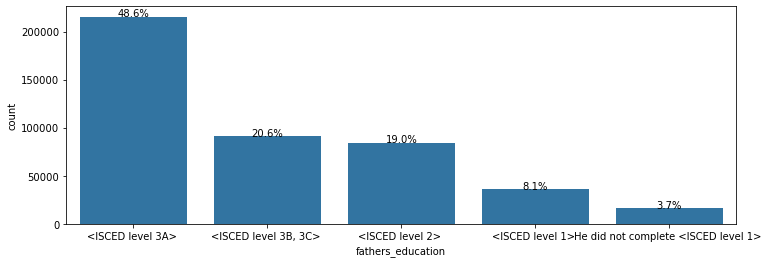

In [43]:
# fot the fathers education
count_plot(df, 'fathers_education')

- From the above plot, it can be seen the 48.6% of the fathers have a general upper secondary qualification, 20.6% with vocational/pre-vocational upper secondary qualification, 19.0% with lower secondary quaification, 8.1% with primary education while only 3.9% of the fathers didn't complete a primary education.

In [44]:
df['highest_parents_education'].value_counts()

ISCED 5A, 6          159942
ISCED 3A, ISCED 4    123304
ISCED 5B              74131
ISCED 2               51506
ISCED 3B, C           30469
ISCED 1               25284
None                   8455
Name: highest_parents_education, dtype: int64

In [45]:
#Order categories of parent's education
parent_order = pd.api.types.CategoricalDtype(
                    categories=['None','ISCED 1','ISCED 2','ISCED 3B, C','ISCED 3A, ISCED 4','ISCED 5B','ISCED 5A, 6'],
                    ordered=True)
df['highest_parents_education'] = df['highest_parents_education'].astype(parent_order)
print(df.highest_parents_education.unique())

['ISCED 3A, ISCED 4', 'ISCED 5A, 6', 'ISCED 3B, C', 'ISCED 2', 'ISCED 5B', 'None', 'ISCED 1', NaN]
Categories (7, object): ['None' < 'ISCED 1' < 'ISCED 2' < 'ISCED 3B, C' < 'ISCED 3A, ISCED 4' < 'ISCED 5B' < 'ISCED 5A, 6']


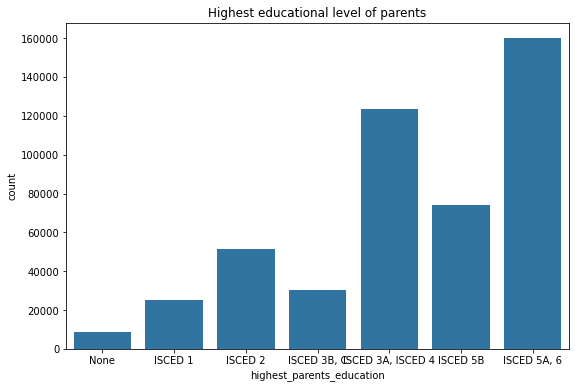

In [46]:
#Highest educational level of parents
plt.figure(figsize=[9, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'highest_parents_education', color = base_color)
plt.title('Highest educational level of parents');

- As can be seen from the plot, more than 50% of the parents have at least a general upper secondary qualification.

### Distribution of their possessions

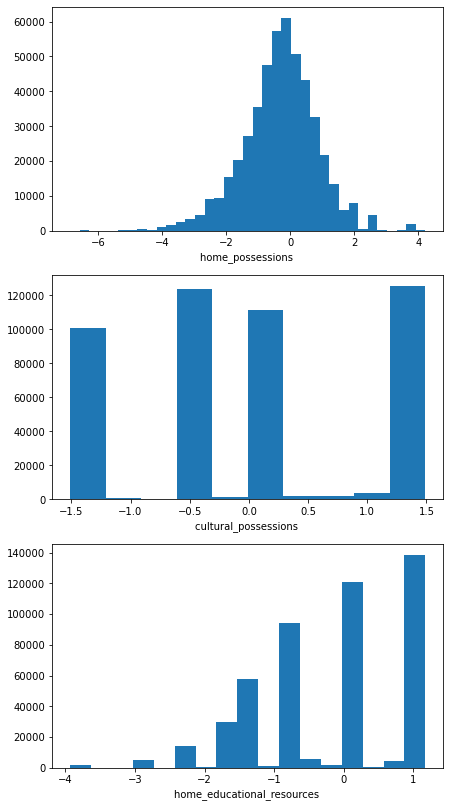

In [47]:

fig, ax = plt.subplots(nrows=3, figsize = [7,14])
bin_size = 0.3
cols = ['home_possessions', 'cultural_possessions', 'home_educational_resources']
for i in range(len(cols)):
    var = cols[i]
    bins = np.arange(np.nanmin(df[var]), np.nanmax(df[var])+bin_size, bin_size)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel('{} '.format(var))

plt.show()

- The household possessions follows a normal distribution centred on 0. Cultural possessions and educational resources show very long bars between which there are empty spaces. As for the educational resources, the bars showing the number of students follows a linearly increasing trend. 

### Distribution of International home language

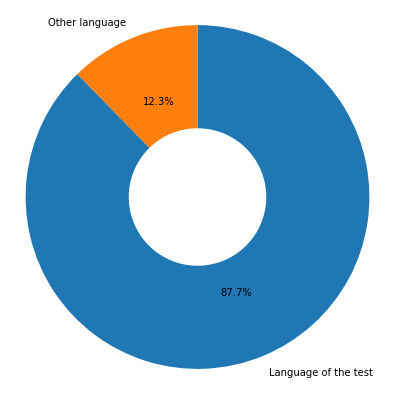

In [48]:
plot_doughnut(df['international_home_language'])

- It can be seen from the graph that majority of the students i.e 87.8% use the same language at home as the language they used in taking the test.

### Distribution of students that owned rooms

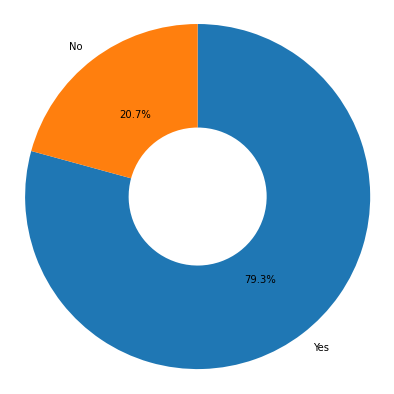

In [49]:
plot_doughnut(df['own_room'])

- As can be seen on the graph, 79.6% of the students in the survey have their personal rooms. In further analysis, we would find out whether or not owning a room affects scores of students.

### Distribution of time for learning(mins)

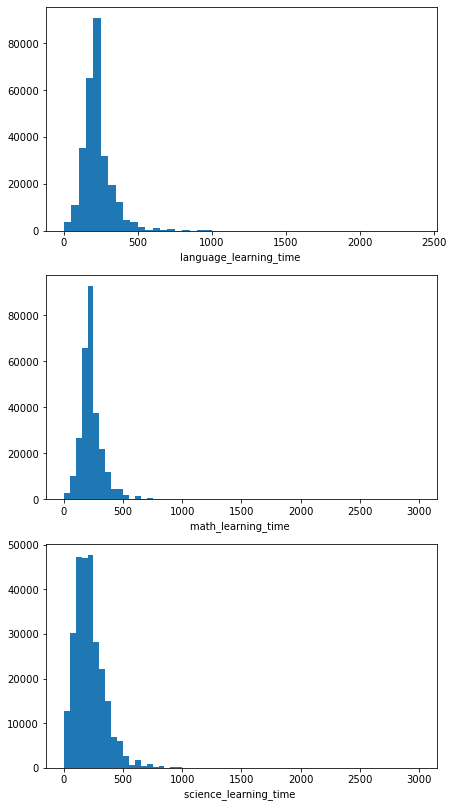

In [50]:
fig, ax = plt.subplots(nrows=3, figsize = [7,14])
bin_size = 50
cols = ['language_learning_time', 'math_learning_time', 'science_learning_time']
for i in range(len(cols)):
    var = cols[i]
    bins = np.arange(np.nanmin(df[var]), np.nanmax(df[var])+bin_size, bin_size)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel('{} '.format(var))

plt.show()

In [51]:
# we then create a column total time which sums all the time spent to learn each course
df['total_learning_time'] = df['math_learning_time'] + df['language_learning_time'] + df['science_learning_time']

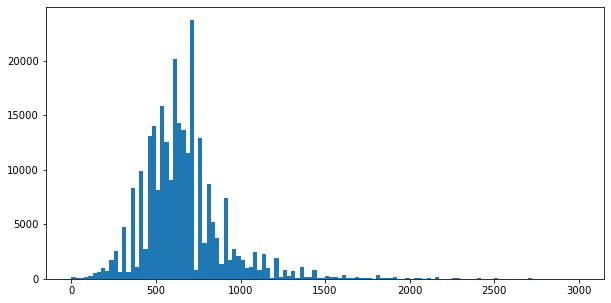

In [52]:
plt.figure(figsize=[10, 5])
bins = np.arange(df['total_learning_time'].min(),df['total_learning_time'].max()+25,25)

plt.hist(data = df, x = 'total_learning_time', bins = bins);

### Distribution of behavioural factors

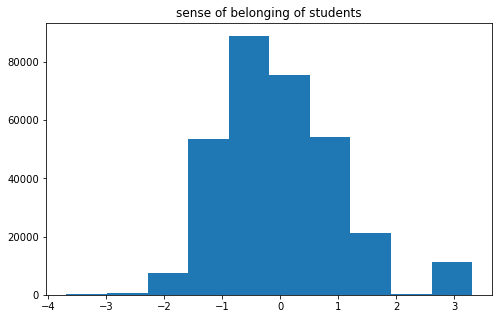

In [53]:
# plotting distribuion sense of belonging
plt.figure(figsize=[8, 5])
bin_size = 0.7
bins = np.arange(np.nanmin(df['sense_belonging']), np.nanmax(df['sense_belonging'])+bin_size, bin_size)
plt.hist(data = df, x = 'sense_belonging', bins = bins)
plt.title('sense of belonging of students');

- As can be seen from the graph, most student show a modest level of belonging. 
- More students show a high level of sense of belonging as compared to low level.

In [54]:
df['perceived_control'].value_counts()

Strongly agree       155325
Agree                137816
Disagree              18002
Strongly disagree      3828
Name: perceived_control, dtype: int64

In [55]:
#Order categories of perceived control
order = pd.api.types.CategoricalDtype(
                    categories=['Strongly disagree','Disagree','Agree','Strongly agree'],
                    ordered=True)
df['perceived_control'] = df['perceived_control'].astype(order)

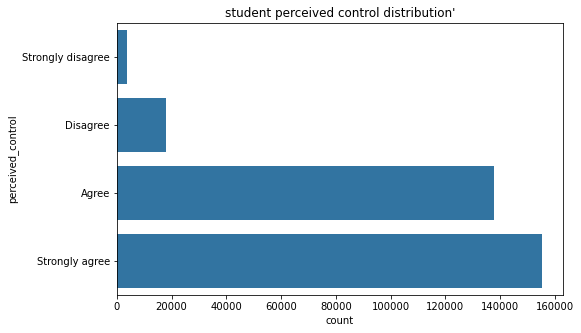

In [56]:
# plotting perceived control
plt.figure(figsize=[8, 5])
sb.countplot(data = df, y = 'perceived_control', color = base_color)
plt.title("student perceived control distribution'");

- As can be seen on the graph, only very few students disagree with the statement 'I can succeed with enough effort'. It is also expected that student that disagreed won't put enough effort in the assessment and likely would have had low scores.

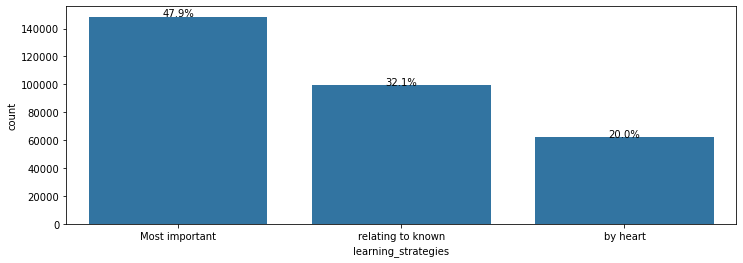

In [57]:
# let's now look at the distribution of the student's learning strategy
count_plot(df, 'learning_strategies')

- As can be seen from the graph, 48.8%(i.e majority) of the student learn by studying the most important parts of a discipline, 31.2% learn by relating new knowledge to existing knowledge while only 20.0% learn by heart.

### Distribution of attitudes in school

In [58]:
df['teacher_stu_rel'].unique

<bound method Series.unique of 0        -1.04
1          NaN
2          NaN
3          NaN
4        -0.02
          ... 
485485     NaN
485486   -1.26
485487   -0.48
485488   -0.02
485489     NaN
Name: teacher_stu_rel, Length: 485490, dtype: float64>

In [59]:
df.columns

Index(['country', 'gender', 'age', 'immigration_status',
       'international_home_language', 'family_structure',
       'highest_parents_education', 'home_educational_resources', 'wealth',
       'home_possessions', 'cultural_possessions', 'own_room',
       'internet_access', 'mothers_education', 'fathers_education',
       'perceived_control', 'learning_strategies', 'sense_belonging',
       'time_computer_use', 'language_learning_time', 'math_learning_time',
       'science_learning_time', 'maths_anxiety', 'att_tow_sch_act',
       'teacher_stu_rel', 'maths_score', 'reading_score', 'science_score',
       'total_score', 'total_learning_time'],
      dtype='object')

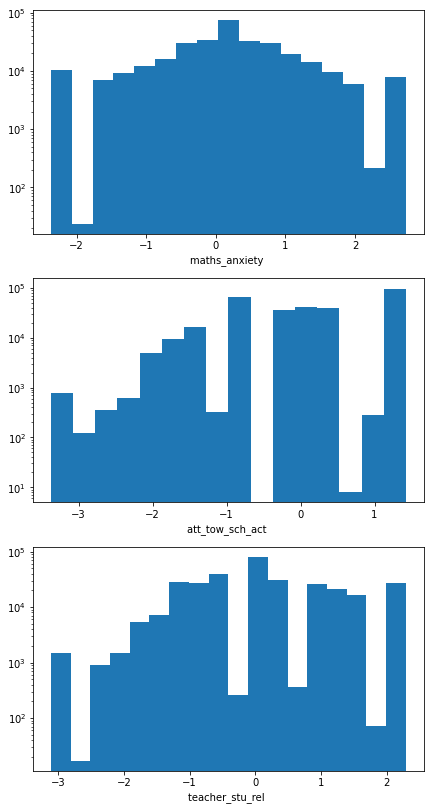

In [60]:
fig, ax = plt.subplots(nrows=3, figsize = [7,14])
bin_size = 0.3
cols = ['maths_anxiety', 'att_tow_sch_act', 'teacher_stu_rel']
for i in range(len(cols)):
    var = cols[i]
    bins = np.arange(np.nanmin(df[var]), np.nanmax(df[var])+bin_size, bin_size)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel('{} '.format(var))
    ax[i].set_yscale('log')

plt.show()

## Bivariate Exploration

In [61]:
df.columns

Index(['country', 'gender', 'age', 'immigration_status',
       'international_home_language', 'family_structure',
       'highest_parents_education', 'home_educational_resources', 'wealth',
       'home_possessions', 'cultural_possessions', 'own_room',
       'internet_access', 'mothers_education', 'fathers_education',
       'perceived_control', 'learning_strategies', 'sense_belonging',
       'time_computer_use', 'language_learning_time', 'math_learning_time',
       'science_learning_time', 'maths_anxiety', 'att_tow_sch_act',
       'teacher_stu_rel', 'maths_score', 'reading_score', 'science_score',
       'total_score', 'total_learning_time'],
      dtype='object')

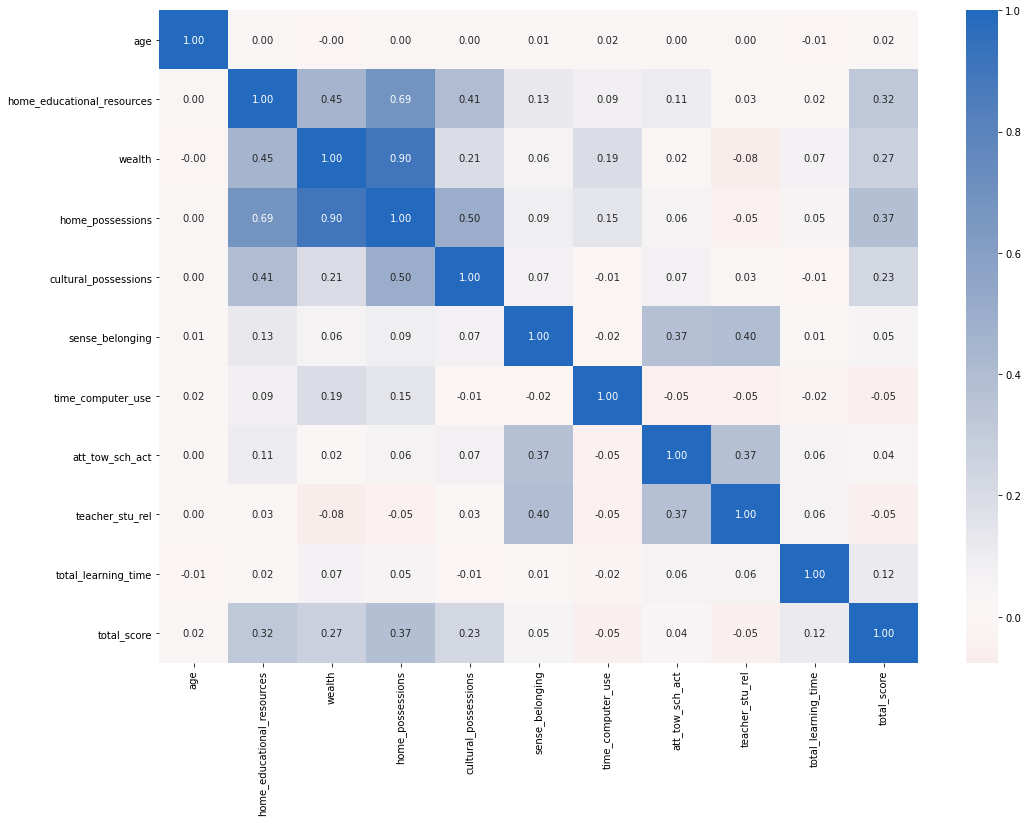

In [62]:
# We will begin with plotting all the numerical variables on a heatmap to check for correlations
col = ['age', 'home_educational_resources' , 'wealth', 'home_possessions', 'cultural_possessions', 
               'sense_belonging', 'time_computer_use', 'att_tow_sch_act','teacher_stu_rel', 'total_learning_time', 'total_score']

plt.figure(figsize = [17, 12])
sb.heatmap(df[col].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

- As can be seen on the graph, the variable that have the highest correlation on the total score are the possesions.

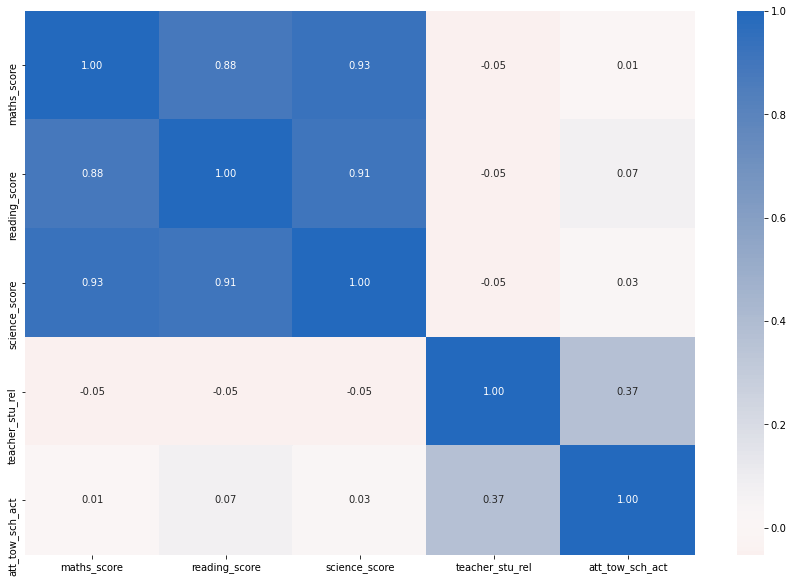

In [63]:
# lets check the correlation between the respective scores
score = ['maths_score','reading_score','science_score','teacher_stu_rel','att_tow_sch_act']

plt.figure(figsize = [15, 10])
sb.heatmap(df[score].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

- As can be seen from the heatmap above, There is a high postive correlation between all the assessments taken by the student. A correlation of 0.93 between the maths score amd science score was expected because a student's performance in maths is in a certain way dependent on his/her understanding of sciences. A student that performs well in sciences is expected to perform well in maths as well as otherwise. Reading being a general test of knowlegde should most likely almost always be correlated on the student's performance in other assessments.

**Taking a deeper look into the scores**

In [64]:
def scatter_heat(x,y):
    plt.figure(figsize = [18, 6])

    # PLOT ON LEFT
    plt.subplot(1, 2, 1)
    sb.regplot(data = df, x = x, y = y, x_jitter=0.04, scatter_kws={'alpha':1/10});

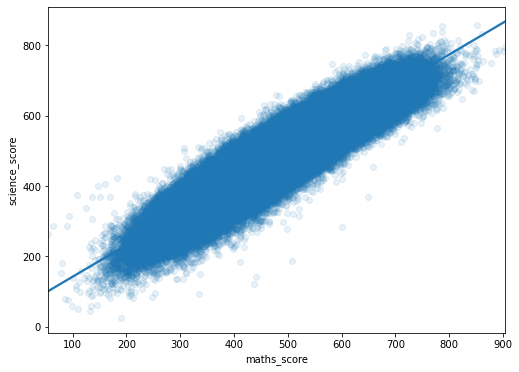

In [65]:
# correlation between maths and science scores
scatter_heat('maths_score','science_score')

- As can be seen on the graph, the positive correlation shows that the higher a student's maths score, the higher the science scores and vice versa.

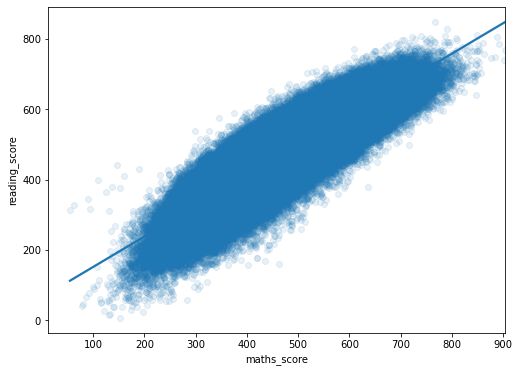

In [66]:
# correlation between maths score and reading score
scatter_heat('maths_score','reading_score')

- - As can be seen on the graph, the positive correlation shows that the higher a student's maths score, the higher the reading scores and vice versa.

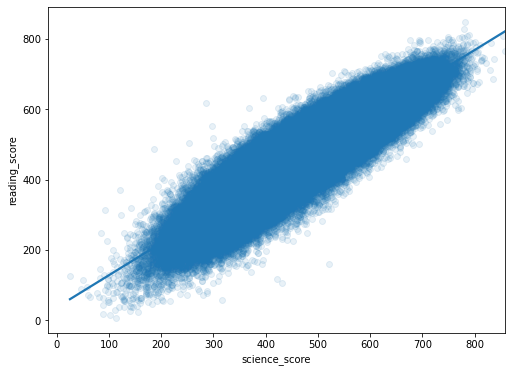

In [67]:
# correlation between science score and reading score
scatter_heat('science_score','reading_score')

- As can be seen on the graph, the positive correlation shows that the higher a student's science score, the higher the science scores and vice versa.

### Checking the relationship between gender and the scores

**Did boys or girls perform better in certain subjects**

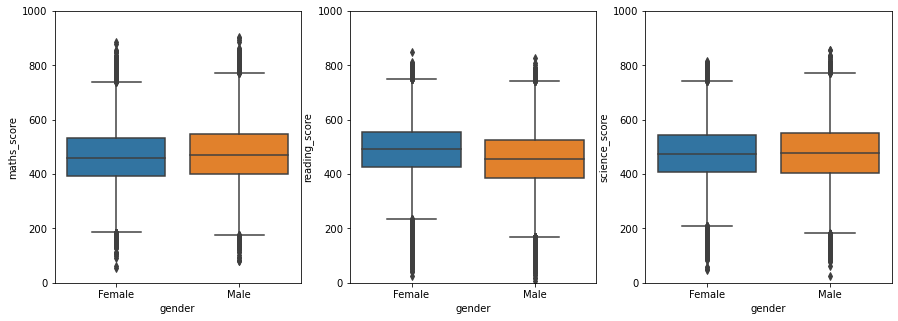

In [68]:
plt.figure(figsize = [15,5])
plt.subplot(1,3,1)
sb.boxplot(data = df, x = 'gender', y = 'maths_score')
plt.ylim([0,1000])
plt.subplot(1,3,2)
sb.boxplot(data = df, x = 'gender', y = 'reading_score')
plt.ylim([0,1000])
plt.subplot(1,3,3)
sb.boxplot(data = df, x = 'gender', y = 'science_score')
plt.ylim([0,1000]);

- As can be seen on the box plot above, there is little or no difference in scores between the genders as the median suggests. In the case of reading scores, the females performed slightly better than the male s expected.

**Did boys or girls perform better generally**

In [69]:
df.groupby(['gender']).mean()['total_score']

gender
Female    1429.129325
Male      1405.578271
Name: total_score, dtype: float64

- There some interesting correlations between gender and the three subjects. Female students seem to do a lot better on the reading scores than male students, this is seen to be true across the whole range of data, as seen in the box plots. 
- Male students seem to do slightly better than female students in the upper band of scores in mathematics and science (though also slightly worse in the lower range of scores in science), however, female students are more likely to achieve average score across all three subjects – i.e. they have less variance across the scores.

### checking for math, reading, science average scores based on countries to find any relation between top performing countries

In [70]:
df_countries = df.groupby('country')[['maths_score','reading_score','science_score','total_score']].mean()

In [71]:
# top performing countries based on total scores
top_country = df_countries.sort_values(by='total_score', ascending=False).head(10).iloc[:,:-1]
top_country

maths_score  reading_score  science_score
country                                                   
China-Shanghai    611.438933     568.629233     579.556540
Hong Kong-China   561.052123     544.521735     554.986433
Singapore         568.546974     537.742138     546.822920
Korea             553.752034     535.805221     537.831998
Japan             535.925248     537.722484     546.413455
Chinese Taipei    558.312010     522.185472     522.356935
Liechtenstein     538.886608     518.275718     527.598522
Estonia           522.340803     518.208090     543.241849
Poland            520.522589     520.763584     528.245169
Macao-China       538.319791     509.095969     520.690411

In [72]:
# least performing countries based on total score
bottom_country = df_countries.sort_values(by='total_score', ascending=False).tail(10).iloc[:,:-1]
bottom_country

maths_score  reading_score  science_score
country                                              
Montenegro   406.728296     419.983824     408.197858
Argentina    395.635711     403.596060     410.478404
Colombia     385.972409     414.221547     408.862431
Albania      394.878912     396.250245     398.916529
Tunisia      387.434260     403.614273     397.831316
Jordan       382.739077     396.514701     404.795878
Brazil       382.547146     400.421704     395.513221
Indonesia    375.621968     397.114815     382.744804
Qatar        376.339232     387.407142     383.531664
Peru         367.859676     384.453116     373.440303

(300.0, 700.0)

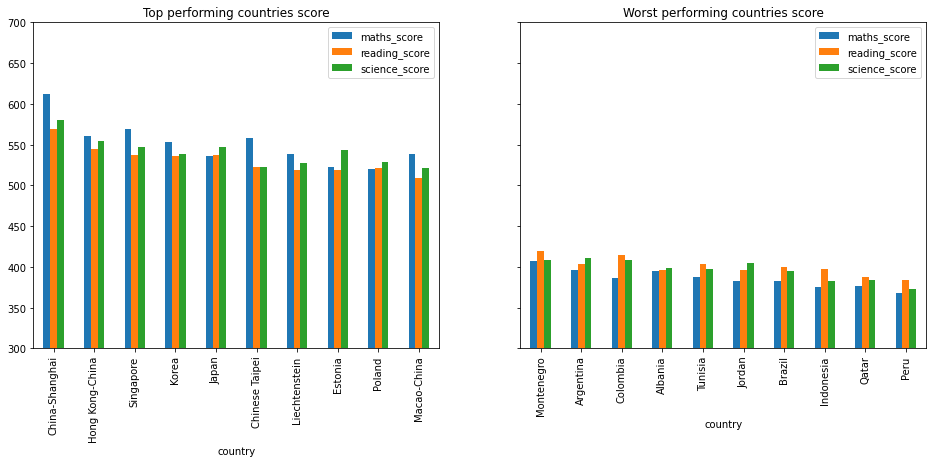

In [73]:
f,axes = plt.subplots(1,2, figsize=(16,6), sharey=True)
top_country.plot(kind='bar',ax=axes[0])
bottom_country.plot(kind='bar',ax=axes[1]);
axes[0].set_title('Top performing countries score');
axes[1].set_title('Worst performing countries score');
plt.ylim(300,700)


- As can be seen above, 50% of the top performers are students from Asia which is quite understandable due to the level and quality of education over there. the other 50% being Europian countries.
- Countries coming at the bottom mainly from South America and middle east with Peru coming last.

**Checking if internet access affected the performance of students**

In [74]:
df_internet = df.groupby('internet_access')[['maths_score','reading_score','science_score','total_score']].mean().reset_index().iloc[:,:-1]
df_internet

internet_access  maths_score  reading_score  science_score
0              No   400.018756     408.247075     409.686776
1             Yes   484.814701     486.403139     490.411081

In [75]:
df_internet_melt = pd.melt(df_internet, id_vars=['internet_access'])
df_internet_melt

internet_access       variable       value
0              No    maths_score  400.018756
1             Yes    maths_score  484.814701
2              No  reading_score  408.247075
3             Yes  reading_score  486.403139
4              No  science_score  409.686776
5             Yes  science_score  490.411081

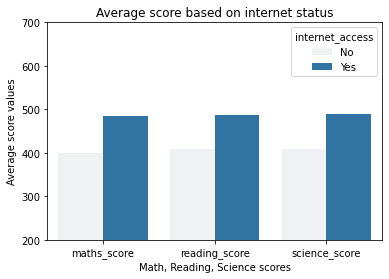

In [76]:
sb.barplot(data=df_internet_melt, x="variable",y="value",hue="internet_access",color=sb.color_palette()[0])
plt.ylim(200,700)
plt.xlabel('Math, Reading, Science scores');
plt.ylabel('Average score values');
plt.title('Average score based on internet status');

- As can be seen above, the effect of internet access was highly significant on each of the scores of the students. Students with internet access performed much better than students without internet access and this is quite relatable.

**Checking for the effect of immigration on the scores**

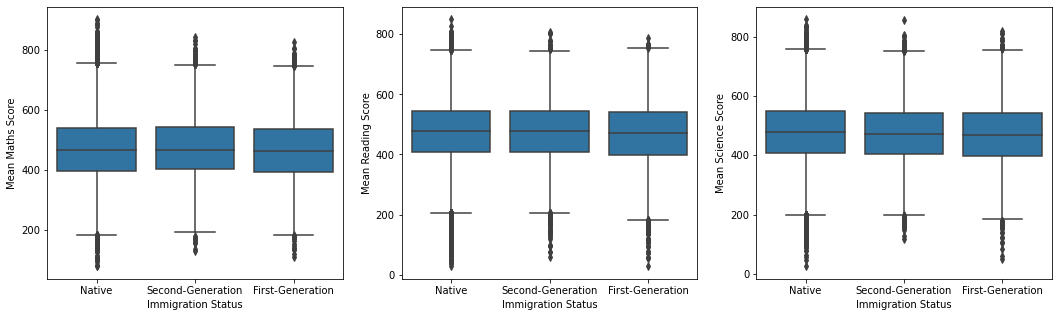

In [77]:

plt.figure(figsize=[18,5])
base_color = sb.color_palette()[0]

plt.subplot(1,3,1)
sb.boxplot(data=df, x='immigration_status', y='maths_score', color = base_color)
plt.xlabel('Immigration Status')
plt.ylabel('Mean Maths Score')

plt.subplot(1,3,2)
sb.boxplot(data=df, x='immigration_status', y='reading_score', color = base_color)
plt.xlabel('Immigration Status')
plt.ylabel('Mean Reading Score')

plt.subplot(1,3,3)
sb.boxplot(data=df, x='immigration_status', y='science_score', color = base_color)
plt.xlabel('Immigration Status')
plt.ylabel('Mean Science Score');

- As can be seen above, there isn't any effect of immigration status on the respective scores of the students.

Text(0, 0.5, 'mean science Score')

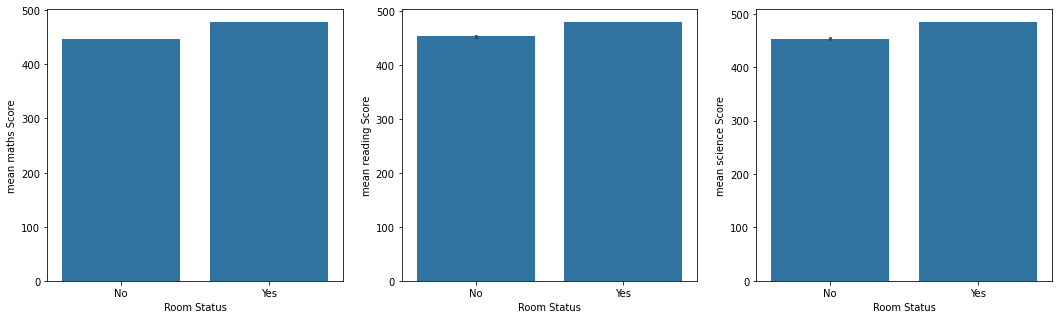

In [78]:
plt.figure(figsize=[18,5])
base_color = sb.color_palette()[0]

plt.subplot(1,3,1)
sb.barplot(data=df, x='own_room', y='maths_score', color=base_color)
plt.xlabel('Room Status')
plt.ylabel('mean maths Score')

plt.subplot(1,3,2)
sb.barplot(data=df, x='own_room', y='reading_score', color=base_color)
plt.xlabel('Room Status')
plt.ylabel('mean reading Score')

plt.subplot(1,3,3)
sb.barplot(data=df, x='own_room', y='science_score', color=base_color)
plt.xlabel('Room Status')
plt.ylabel('mean science Score')

- As can be seen, owning a room slightly affects the outcome of the scores in each subject. The students that owned rooms performed slightly better than those without rooms and this was quite expected. 

**Checking for the effect of possessions on the scores**

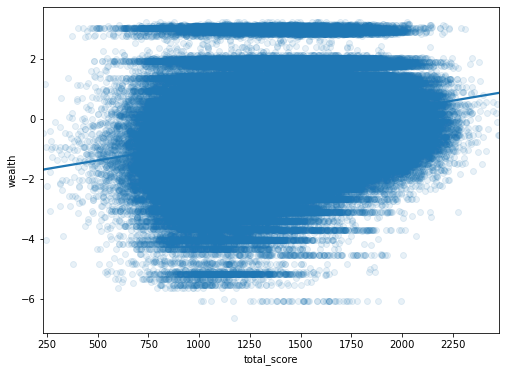

In [79]:
scatter_heat('total_score','wealth')

- As can be seen, wealth as a very little positive correlation with the toal scores of the students. Therefore, it won't be used in further analysis as its effect is not effective.

### Checking the effect of the behavioural factors on the scores of the students

In [80]:
# Order categories of perceived control
preceived = pd.api.types.CategoricalDtype(
                    categories=['Strongly disagree','Disagree','Agree','Strongly agree'],
                    ordered=True)
df['perceived_control'] = df['perceived_control'].astype(preceived)

In [81]:
df['family_structure'].unique()

array(['two parents', nan, 'no parents', 'single parent'], dtype=object)

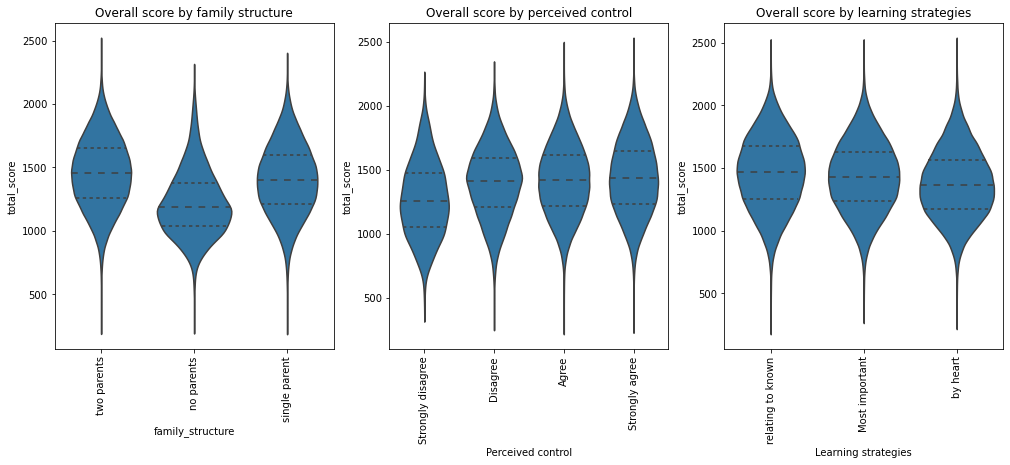

In [82]:
plt.figure(figsize = [17, 6])
base_color = sb.color_palette()[0]

plt.subplot(1, 3, 1)
sb.violinplot(data = df, x = 'family_structure', y = 'total_score', color = base_color,
              inner="quartile")
plt.title('Overall score by family structure')
plt.xticks(rotation=90);

plt.subplot(1, 3, 2)
sb.violinplot(data = df, x = 'perceived_control', y = 'total_score', color = base_color,
              inner="quartile").set(xlabel = 'Perceived control')
plt.title('Overall score by perceived control')
plt.xticks(rotation=90);


plt.subplot(1, 3, 3)
sb.violinplot(data = df, x = 'learning_strategies', y = 'total_score', color = base_color,
              inner="quartile").set(xlabel = 'Learning strategies')
plt.title('Overall score by learning strategies')
plt.xticks(rotation=90);

- Students with one- or two-parents show similar mean scores, while those students who grew up without parents show an overall lower score of almost 100 points lower.

- Students who strongly disagree with the statement 'I can succeed with enough effort' show lower overall scores than the rest of the students.

- The most effective learning strategies in decreasing order are: relating to existing concepts > studying what is most important > studying from memory.

### Checking the effects of parents education on the scores of students

In [83]:
#Order categories of parent'seducation
parent_edu = pd.api.types.CategoricalDtype(
                    categories=['None','ISCED 1','ISCED 2','ISCED 3B, C','ISCED 3A, ISCED 4','ISCED 5B','ISCED 5A, 6'],
                    ordered=True)
df['highest_parents_education'] = df['highest_parents_education'].astype(parent_edu)
print(df.highest_parents_education.unique())

['ISCED 3A, ISCED 4', 'ISCED 5A, 6', 'ISCED 3B, C', 'ISCED 2', 'ISCED 5B', 'None', 'ISCED 1', NaN]
Categories (7, object): ['None' < 'ISCED 1' < 'ISCED 2' < 'ISCED 3B, C' < 'ISCED 3A, ISCED 4' < 'ISCED 5B' < 'ISCED 5A, 6']


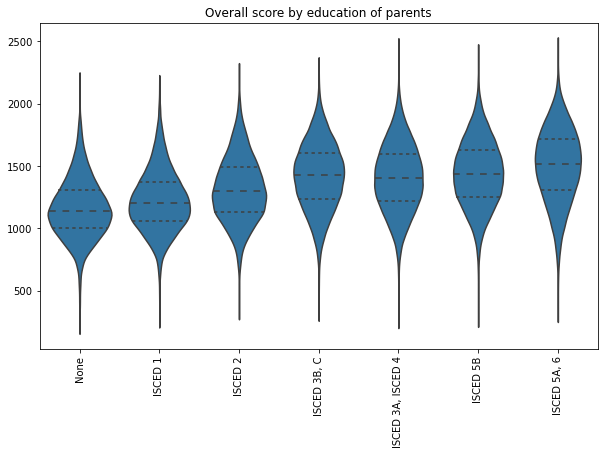

In [84]:
# let's check the effect of the parents education first
plt.figure(figsize = [10, 6])
sb.violinplot(data = df, x = 'highest_parents_education', y = 'total_score', color = base_color,
              inner="quartile").set(xlabel = None, ylabel = None)
plt.title('Overall score by education of parents')
plt.xticks(rotation=90);


- Just as expected, there is a positive correlation between the educational level of the parents and the scores of the students i.e the higher the level of education, the higher the score and vice vesa.

**Checking the effect of learning time on each of the assessment taken**

In [85]:
df.columns

Index(['country', 'gender', 'age', 'immigration_status',
       'international_home_language', 'family_structure',
       'highest_parents_education', 'home_educational_resources', 'wealth',
       'home_possessions', 'cultural_possessions', 'own_room',
       'internet_access', 'mothers_education', 'fathers_education',
       'perceived_control', 'learning_strategies', 'sense_belonging',
       'time_computer_use', 'language_learning_time', 'math_learning_time',
       'science_learning_time', 'maths_anxiety', 'att_tow_sch_act',
       'teacher_stu_rel', 'maths_score', 'reading_score', 'science_score',
       'total_score', 'total_learning_time'],
      dtype='object')

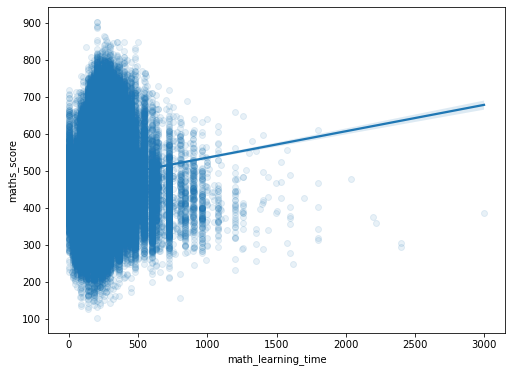

In [86]:
scatter_heat('math_learning_time','maths_score')

- As expected, the amount put into the learning of mathematics doesn't guarantee a good score in the assessment as seen above.

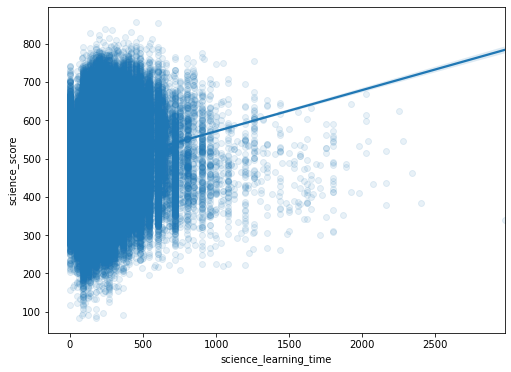

In [87]:
scatter_heat('science_learning_time','science_score')

- The correlation seen above is very slightly positive and so there is no guarantee than studying sciences for long hours will bring about higher scores in the assessment.

## Multivariate Exploration

### Scores per gender in each country

Text(0.5, 1.04, 'Reading Scores per Gender in Countries')

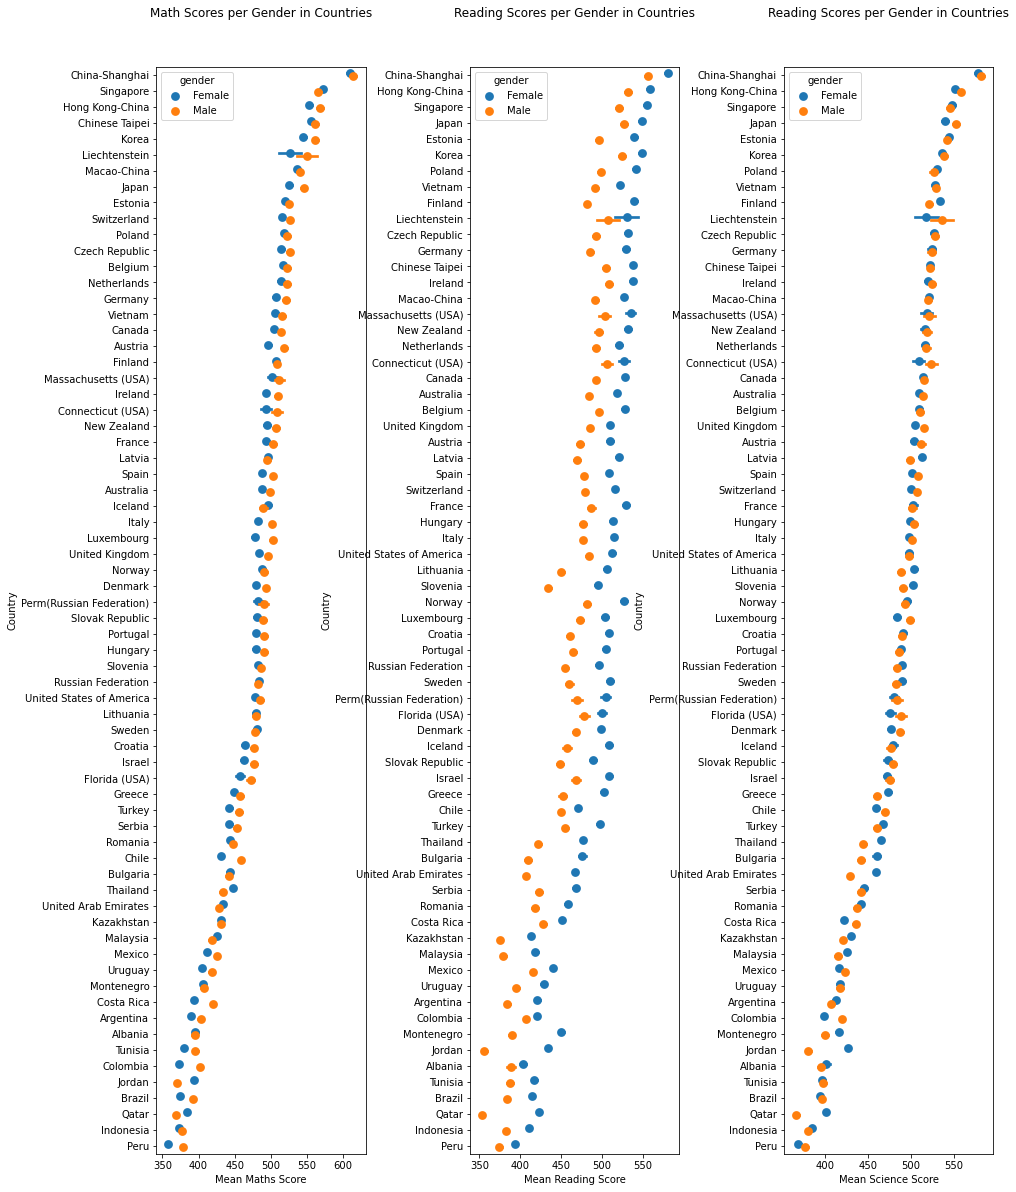

In [88]:
# using pointplot subplots, plot each country against the mean scores, with gender in 'hue' 
maths = df.groupby('country')['maths_score'].mean().sort_values(ascending = False).index
reading = df.groupby('country')['science_score'].mean().sort_values(ascending = False).index
science = df.groupby('country')['science_score'].mean().sort_values(ascending = False).index

#plot
plt.figure(figsize = [15, 20])
plt.subplots_adjust(wspace = 0.5)

plt.subplot(1,3,1)
ax = sb.pointplot(data = df, x= 'maths_score', y = 'country', hue = 'gender', dodge = 0.2,
                  linestyles = "", order = maths)
plt.ylabel('Country')
plt.xlabel('Mean Maths Score')
plt.title('Math Scores per Gender in Countries', y =1.04)

plt.subplot(1,3,2)
ax = sb.pointplot(data = df, x= 'reading_score', y = 'country', hue = 'gender', dodge = 0.2,
                  linestyles = "", order = reading)
plt.ylabel('Country')
plt.xlabel('Mean Reading Score')
plt.title('Reading Scores per Gender in Countries', y =1.04)

plt.subplot(1,3,3)
ax = sb.pointplot(data = df, x= 'science_score', y = 'country', hue = 'gender', dodge = 0.2,
                  linestyles = "", order = reading)
plt.ylabel('Country')
plt.xlabel('Mean Science Score')
plt.title('Reading Scores per Gender in Countries', y =1.04)

- It is evident that the boys slightly outperformed the girls in maths in almost all the countries except for Iceland, Jordan and Qatar. As earlier shown, boys performed better generally at Maths compared to girls.
- The girls outperformed the boys in every country for the reading assessment in this dataset and they were really large margins between them for some countries like Finland, Germany, Jordan, Bulgaria, UAE, Qatar e.t.c
- For the science scores, there was very little seperatin them in almost all the countries except for Jordan and Qatar where the females clearly performed better. 

In [89]:
df['home_possessions'].describe()

count    479807.000000
mean         -0.324815
std           1.163213
min          -6.880000
25%          -0.980000
50%          -0.260000
75%           0.390000
max           4.150000
Name: home_possessions, dtype: float64

In [90]:
# getting a variable to rate possessions
#Create a new variable of social class
df.loc[(df['home_possessions'] < -0.9), 'social_class'] = 'low'
df.loc[(df['home_possessions'] > -0.9) & (df['home_possessions'] <= 0.5), 'social_class'] = 'middle'
df.loc[(df['home_possessions'] > 0.5), 'social_class'] = 'high'

#Order categories of social class
social_order = pd.api.types.CategoricalDtype(
                    categories=['low','middle','high'], ordered=True)
df['social_class'] = df['social_class'].astype(social_order)
print(df.social_class.unique())

['low', 'high', 'middle', NaN]
Categories (3, object): ['low' < 'middle' < 'high']


**total score by parents education and social class**

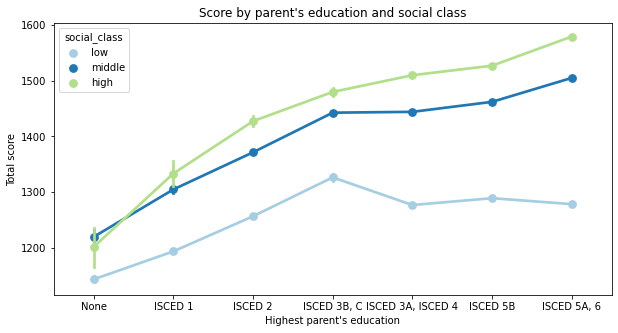

In [91]:
plt.figure(figsize = [10, 5])
sb.pointplot(data = df, x = 'highest_parents_education', y = 'total_score', hue = 'social_class', palette = "Paired")
plt.xlabel("Highest parent's education")
plt.ylabel('Total score')
plt.title("Score by parent's education and social class");

NB: Social class measures the number of belongings at home
- A higher level of Education by the parents leads to a better score for the student. AS can  be seen on the graph, the students having parents with the highest level of education and highest possession(high social class) have the highest scores and vice versa.
- It can also be seen that in the lower social class, the maximum grade peak is reached with a parental education of ISCED 3B, 4. 

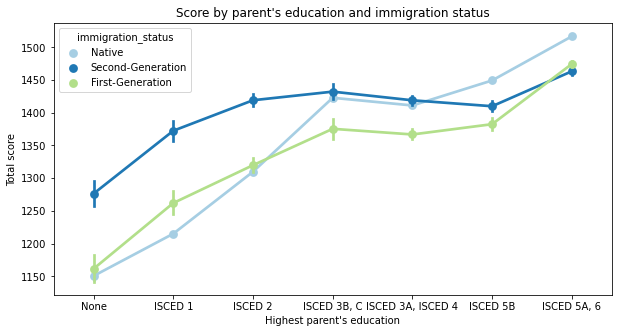

In [92]:
plt.figure(figsize = [10, 5])
sb.pointplot(data = df, x = 'highest_parents_education', y = 'total_score', hue = 'immigration_status', palette = "Paired")
plt.xlabel("Highest parent's education")
plt.ylabel('Total score')
plt.title("Score by parent's education and immigration status");

- Although the impact of parent's educational background is positively correlated to student's grades, it is more noticable in families with native-born parents. In the case of parents with an educational level up to ISCED 2, students with second-generation immigrant parents show better test scores while student's having parent's with highest qualification and native-born have the highest scores.

### Checking if there is a correlation between the scores and learning time with respect to the learning strategies

In [93]:
df['total_learning_time'].unique()

array([  nan,  675.,  360., ..., 1218.,  172.,  134.])

In [94]:
random = np.random.choice(df.shape[0], 50000, replace = False)
sample = df.loc[random, :]

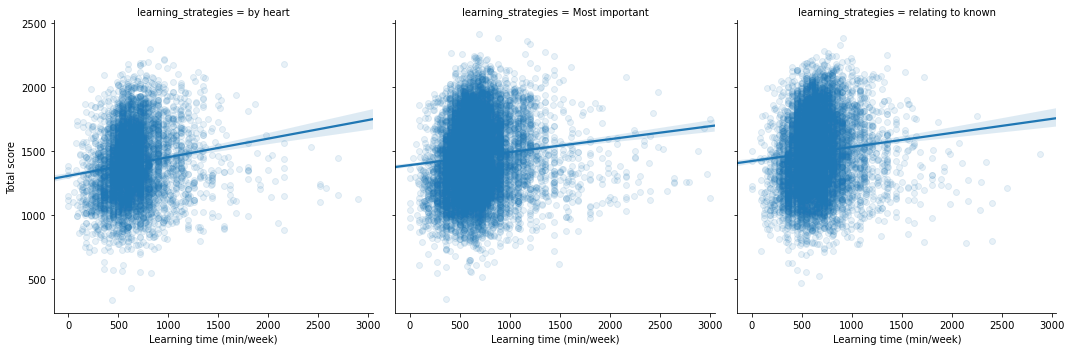

In [95]:
g = sb.FacetGrid(data = sample, col ='learning_strategies', height = 5)
g.map(sb.regplot, 'total_learning_time', 'total_score', fit_reg = True,
      truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/10})

g.set_xlabels('Learning time (min/week)')
g.set_ylabels('Total score')
plt.show()

- The plot doesn't clearly answer my question as the plot is just slightly positively correlated

In [96]:
df['perceived_control'].unique()

['Agree', 'Strongly agree', NaN, 'Disagree', 'Strongly disagree']
Categories (4, object): ['Strongly disagree' < 'Disagree' < 'Agree' < 'Strongly agree']

In [97]:
#Order categories of perceived control
perceive = pd.api.types.CategoricalDtype(
                    categories=['Strongly agree','Agree','Disagree', 'Strongly disagree'],
                    ordered=True)
df['perceived_control'] = df['perceived_control'].astype(perceive)
print(df.perceived_control.unique())

['Agree', 'Strongly agree', NaN, 'Disagree', 'Strongly disagree']
Categories (4, object): ['Strongly agree' < 'Agree' < 'Disagree' < 'Strongly disagree']


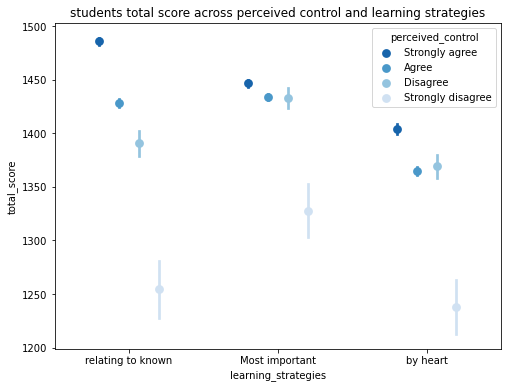

In [98]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'learning_strategies', y = 'total_score', hue = 'perceived_control',
         palette = 'Blues_r', linestyles = '', dodge = 0.4)
plt.title('students total score across perceived control and learning strategies')
ax.set_yticklabels([],minor = True)
plt.show();

NB : perceived control shows to what extent does the student identify with the statement "I can succeed with enough effort".
- Across every learning strategy, strongly disagreeing with the statement above will lead to a lower score compared to other options regardless of the learning strategy while the reverse is the case with the students who strongly believe in success inherent from inputing enough effort.
- students that learn by means of relating new concepts to existing ones and strongly agree with the statement above most usually will have the highest scores.
- As seen in earlier representation that the most effective learning strategy is relating new concepts to existing, applying this strategy and disagreeing with the statement above will lead to lower scores.